<a href="https://colab.research.google.com/github/enzomaeda1/Computacao-Paralela/blob/main/A3_GeneticAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Algoritmos Genéticos**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '1115665, Adriana Fujita' #@param {type:"string"}
Aluno2 = '1115677, Daniel Henrique' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



In [ ]:
#@title **Escolha a opção de Exercício Selecionado**
Exercicio_selecionado = "Exercício A. Otimização multi-objetivo" #@param ["Exercício A. Otimização multi-objetivo", "Exercício B. Forca"]




# **Resumo**

*Apresente um parágrafo resumindo o que é feito neste trabalho*.

# **Descrição da Solução**

*Discuta aqui os principais aspectos da solução desenvolvida*.

- Para a opção *Exercício A. Otimização multi-objetivo*, isso envolve descrever o cenário fictício do problema de otimização e são construídas as funções objetivo.

- Para a opção *Exercício B. Força*, isso envolve descrever resumidamente em tópicos como é construído o seu algoritmo genético para cada uma das etapas (representação das soluções em genes, função de fitness, crossover, mutação e seleção), ou, no caso de empregar o PyGDA, descrever a modelagem empregada.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



In [30]:
!pip install pygad

Geração: 1
Melhor Fitness: 3.41
Geração: 2
Melhor Fitness: 3.41
Geração: 3
Melhor Fitness: 3.41
Geração: 4
Melhor Fitness: 3.67
Geração: 5
Melhor Fitness: 3.67
Geração: 6
Melhor Fitness: 3.67
Geração: 7
Melhor Fitness: 3.67
Geração: 8
Melhor Fitness: 3.67
Geração: 9
Melhor Fitness: 3.67
Geração: 10
Melhor Fitness: 3.67
Geração: 11
Melhor Fitness: 3.67
Geração: 12
Melhor Fitness: 3.67
Geração: 13
Melhor Fitness: 3.67
Geração: 14
Melhor Fitness: 3.67
Geração: 15
Melhor Fitness: 3.67
Geração: 16
Melhor Fitness: 3.67
Geração: 17
Melhor Fitness: 3.67
Geração: 18
Melhor Fitness: 3.67
Geração: 19
Melhor Fitness: 3.67
Geração: 20
Melhor Fitness: 3.67
Geração: 21
Melhor Fitness: 3.67
Geração: 22
Melhor Fitness: 3.67
Geração: 23
Melhor Fitness: 3.67
Geração: 24
Melhor Fitness: 3.67
Geração: 25
Melhor Fitness: 3.67
Geração: 26
Melhor Fitness: 3.67
Geração: 27
Melhor Fitness: 3.67
Geração: 28
Melhor Fitness: 3.67
Geração: 29
Melhor Fitness: 3.67
Geração: 30
Melhor Fitness: 3.67
Geração: 31
Melhor 

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


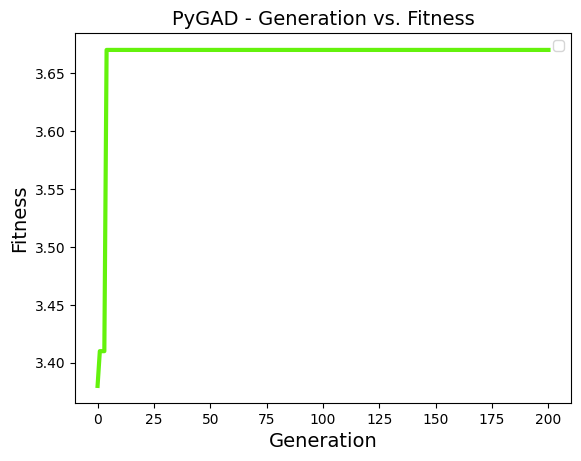

Quantidade de funcionários por faixa salarial: [75 92 98 67 34]
Fitness da melhor solução: 3.66
Número total de funcionários contratados: 366
Custo total da folha de pagamento: 991000


In [64]:
# Seus Códigos aqui intercalados de células de texto com comentários

import pygad
import numpy as np

# Salário dos funcionários em diferentes faixas
fatores = {
    "salario1": 1000,
    "salario2": 2000,
    "salario3": 3000,
    "salario4": 4000,
    "salario5": 5000
}

# Lista de valores dos fatores
function_inputs = np.array(list(fatores.values()))
# Orçamento máximo
orcamento_maximo = 1000000  # Pode ser ajustado conforme o caso real
# Quantidade desejada de funcionários
quantidade_desejada = 100

def fitness_func(ga_instance, solution, solution_idx):
    total_funcionarios = np.sum(solution)
    total_custo = np.sum(solution * function_inputs)

    if total_custo > orcamento_maximo:
        return 0  # Penaliza soluções que ultrapassam o orçamento

    fitness = total_funcionarios / quantidade_desejada  # Maximiza o número de funcionários
    return fitness

num_generations = 200  # Número de gerações
num_parents_mating = 10  # Quantidade de pais selecionados

sol_per_pop = 20  # Tamanho da população
num_genes = len(function_inputs)

def on_generation(ga_instance):
    print(f"Geração: {ga_instance.generations_completed}")
    print(f"Melhor Fitness: {ga_instance.best_solution()[1]}")




# Configuração do Algoritmo Genético
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    fitness_func=fitness_func,
    on_generation=on_generation,
    init_range_low=0,
    init_range_high=100,
    gene_type = int
)

# Executa o algoritmo
ga_instance.run()
ga_instance.plot_fitness()

# Exibe os melhores resultados
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Quantidade de funcionários por faixa salarial: {solution}")
print(f"Fitness da melhor solução: {solution_fitness}")

total_funcionarios = np.sum(solution)
total_custo = np.sum(solution * function_inputs)
print(f"Número total de funcionários contratados: {int(total_funcionarios)}")
print(f"Custo total da folha de pagamento: {total_custo}")

# **Resultados (Testes)**

*Faça aqui no mínimo 4 simulações para diferentes configuraçõoes do seu problema, que mostrem a efetividade da sua solução. Você pode começar com problemas menores e crescer a complexidade a medida que avança nos problemas. Apresente a solução e o gráfico de convergência da solução ao longo das gerações. Comente em células de texto explicativas os testes e os seus resultados.*



In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas empregadas em formato ABNT.

---

In [ ]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Descricao_solucao = 7 #@param {type:"slider", min:0, max:10, step:1}

Implementacao = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Resumo + Descricao_solucao + Implementacao + Resultados + Referencias + Geral

nota = nota / 6

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.7
1,1115677,DANIEL HENRIQUE,7.7
